In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy
from sklearn import metrics

In [3]:
# Data Preprocessing
trainData = pd.read_csv('adult-training.csv')
trainData.columns = ['Age','WorkClass','fnlwgt','Education','Education_num','Martial_status','Occupation','Relationship','Race','Gender','capital_gain', 'capital_loss', 'hours_per_week','Country','Income']
trainX = trainData.drop(['Income'],axis=1)
trainY = trainData.drop(['Age','WorkClass','fnlwgt','Education','Education_num','Martial_status','Occupation','Relationship','Race','Gender','capital_gain', 'capital_loss', 'hours_per_week','Country'],axis=1)
trainY = pd.get_dummies(trainY)
trainY = trainY.drop(['Income_ <=50K'], axis = 1)
trainX = pd.get_dummies(trainX)


In [4]:
#Data preprocessing and Training for Race aware-classifirer
testData= pd.read_csv('adult-test.csv')
testX = testData.drop(['Income'],axis=1)
testY = testData.drop(['Age','WorkClass','fnlwgt','Education','Education_num','Martial_status','Occupation','Relationship','Race','Gender','capital_gain', 'capital_loss', 'hours_per_week','Country'],axis=1)
testY = pd.get_dummies(testY)
testY = testY.drop(['Income_<=50K.'],axis=1)
testY.columns=['Income_ >50K']
testX = pd.get_dummies(testX)
for co in testX.columns:
    if co not in trainX.columns:
        print(co)
for co in trainX.columns:
    if co not in testX.columns:
        print(co)


Education_10th
Education_11th
Education_12th
Education_1st-4th
Education_5th-6th
Education_7th-8th
Education_9th
Education_ 10th
Education_ 11th
Education_ 12th
Education_ 1st-4th
Education_ 5th-6th
Education_ 7th-8th
Education_ 9th
Country_ Holand-Netherlands


In [5]:
trainX = trainX.drop(['Country_ Holand-Netherlands'],axis=1)

In [6]:
trainX.rename(columns = {'Education_ 10th':'Education_10th','Education_ 11th':'Education_11th','Education_ 12th':'Education_12th','Education_ 1st-4th':'Education_1st-4th','Education_ 5th-6th':'Education_5th-6th','Education_ 7th-8th':'Education_7th-8th','Education_ 9th':'Education_9th'},inplace = True)
for co in testX.columns:
    if co not in trainX.columns:
        print(co)
for co in trainX.columns:
    if co not in testX.columns:
        print(co)

In [7]:
clf =  RandomForestClassifier(oob_score=True)
errors = []
estimators = []
for i in range(100,200):
    clf.set_params(n_estimators=i)
    clf.fit(trainX, trainY)
    estimators.append(i)
    oob_error = 1 - clf.oob_score_
    errors.append(oob_error)

/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

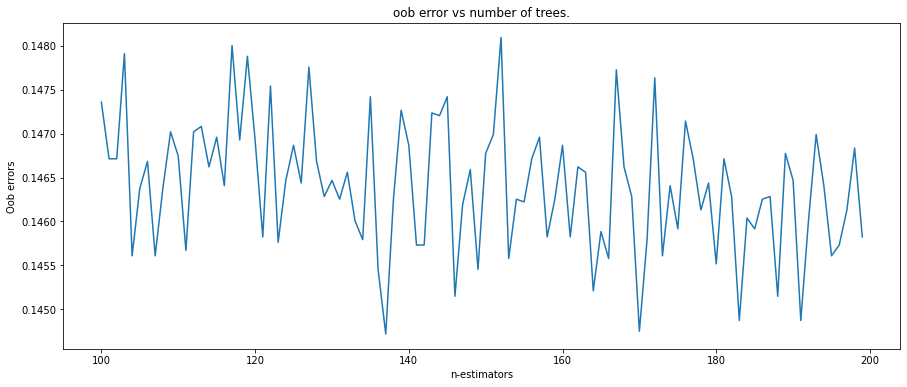

In [8]:
plt.figure(figsize=(15,6))
plt.plot(estimators, errors)
plt.xlabel("n-estimators")  # add X-axis label
plt.ylabel("Oob errors")  # add Y-axis label
plt.title("oob error vs number of trees.") 
plt.show(estimators,errors)

In [9]:
for i in range(0,100):
    if errors[i] < 0.145:
        print(i)
        print(str(estimators[i]) + ": " + str(errors[i]))

37
137: 0.14471744471744474
70
170: 0.14474815724815726
83
183: 0.14487100737100733
91
191: 0.14487100737100733


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
clf.set_params(n_estimators=170)
clf.fit(trainX, trainY)
pred = clf.predict(testX)
confusionMatrix = confusion_matrix(pred, testY)
print('Accuracy score: '+ str(accuracy_score(pred,testY)))
print('Confusion Matrix: ' + str(confusionMatrix))

/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/1178440520.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Accuracy score: 0.8613721515877403
Confusion Matrix: [[11874  1696]
 [  561  2150]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.88      0.95      0.91     12435
   Income>50       0.79      0.56      0.66      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.76      0.78     16281
weighted avg       0.86      0.86      0.85     16281



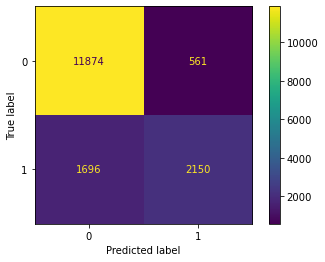

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
ConfusionMatrixDisplay.from_estimator(clf, testX, testY)
target_names = ['Income<=50','Income>50']
print(classification_report(testY, pred, target_names=target_names))

In [22]:
#Data preprocessing for testing of different ethnic groups
base = pd.get_dummies(testData)
baseDrop = base.drop(['Income_<=50K.'],axis=1)
baseRename = baseDrop.rename(columns ={'Income_>50K.':'Income_ >50K'})

In [33]:
#Eskimo group testing for Race-Aware Classifier
group = baseRename.groupby('Race_ Amer-Indian-Eskimo')
groupEskimo = group.get_group(1)
eskimoX = groupEskimo.drop(['Income_ >50K'],axis = 1)
eskimoY = groupEskimo['Income_ >50K']
predEskimo = clf.predict(eskimoX)
confusionMatrix = confusion_matrix(predEskimo, eskimoY)
print('Accuracy score: '+ str(accuracy_score(predEskimo,eskimoY)))
print('Confusion Matrix: ' + str(confusionMatrix))

Accuracy score: 0.9119496855345912
Confusion Matrix: [[138  12]
 [  2   7]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.92      0.99      0.95       140
   Income>50       0.78      0.37      0.50        19

    accuracy                           0.91       159
   macro avg       0.85      0.68      0.73       159
weighted avg       0.90      0.91      0.90       159



/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


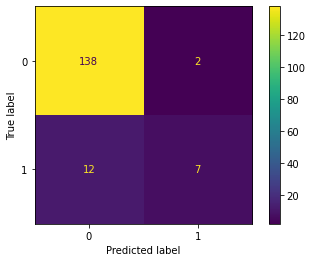

In [34]:
ConfusionMatrixDisplay.from_estimator(clf, eskimoX,eskimoY)
target_names = ['Income<=50','Income>50']
print(classification_report(eskimoY, predEskimo, target_names=target_names))

In [36]:
#Asian and pacific Islander group testing for Race-Aware Classifier
groupA = baseRename.groupby('Race_ Asian-Pac-Islander')
groupAsian= groupA.get_group(1)
asianX = groupAsian.drop(['Income_ >50K'],axis = 1)
asianY = groupAsian['Income_ >50K']
predAsian = clf.predict(asianX)
confusionMatrix = confusion_matrix(predAsian, asianY)
print('Accuracy score: '+ str(accuracy_score(predAsian,asianY)))
print('Confusion Matrix: ' + str(confusionMatrix))

Accuracy score: 0.8458333333333333
Confusion Matrix: [[331  58]
 [ 16  75]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.85      0.95      0.90       347
   Income>50       0.82      0.56      0.67       133

    accuracy                           0.85       480
   macro avg       0.84      0.76      0.78       480
weighted avg       0.84      0.85      0.84       480



/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


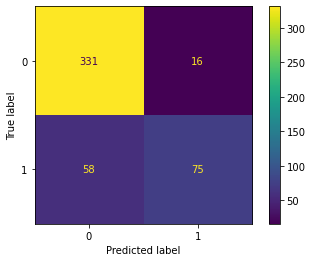

In [37]:
ConfusionMatrixDisplay.from_estimator(clf, asianX,asianY)
target_names = ['Income<=50','Income>50']
print(classification_report(asianY, predAsian, target_names=target_names))

In [41]:
#Black group testing for Race-Aware Classifier
groupB = baseRename.groupby('Race_ Black')
groupBlack= groupB.get_group(1)
blackX = groupBlack.drop(['Income_ >50K'],axis = 1)
blackY = groupBlack['Income_ >50K']
predBlack = clf.predict(blackX)
confusionMatrix = confusion_matrix(predBlack, blackY)
print('Accuracy score: '+ str(accuracy_score(predBlack,blackY)))
print('Confusion Matrix: ' + str(confusionMatrix))

Accuracy score: 0.9250480461242793
Confusion Matrix: [[1361   96]
 [  21   83]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.93      0.98      0.96      1382
   Income>50       0.80      0.46      0.59       179

    accuracy                           0.93      1561
   macro avg       0.87      0.72      0.77      1561
weighted avg       0.92      0.93      0.92      1561



/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


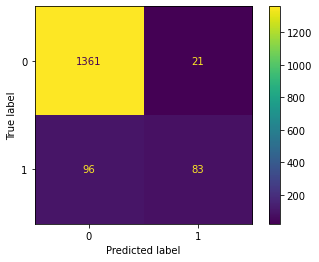

In [42]:
ConfusionMatrixDisplay.from_estimator(clf, blackX,blackY)
target_names = ['Income<=50','Income>50']
print(classification_report(blackY, predBlack, target_names=target_names))

In [43]:
#Other group testing for Race-Aware Classifier
groupO = baseRename.groupby('Race_ Other')
groupOther= groupO.get_group(1)
otherX = groupOther.drop(['Income_ >50K'],axis = 1)
otherY = groupOther['Income_ >50K']
predOther = clf.predict(otherX)
confusionMatrix = confusion_matrix(predOther, otherY)
print('Accuracy score: '+ str(accuracy_score(predOther,otherY)))
print('Confusion Matrix: ' + str(confusionMatrix))

Accuracy score: 0.8666666666666667
Confusion Matrix: [[109  17]
 [  1   8]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.87      0.99      0.92       110
   Income>50       0.89      0.32      0.47        25

    accuracy                           0.87       135
   macro avg       0.88      0.66      0.70       135
weighted avg       0.87      0.87      0.84       135



/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


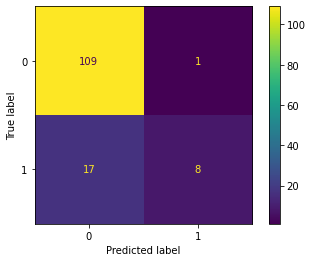

In [44]:
ConfusionMatrixDisplay.from_estimator(clf, otherX,otherY)
target_names = ['Income<=50','Income>50']
print(classification_report(otherY, predOther, target_names=target_names))

In [45]:
#White group testing for Race-Aware Classifier
groupW = baseRename.groupby('Race_ White')
groupWhite= groupW.get_group(1)
whiteX = groupWhite.drop(['Income_ >50K'],axis = 1)
whiteY = groupWhite['Income_ >50K']
predWhite = clf.predict(whiteX)
confusionMatrix = confusion_matrix(predWhite, whiteY)
print('Accuracy score: '+ str(accuracy_score(predWhite,whiteY)))
print('Confusion Matrix: ' + str(confusionMatrix))

/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Accuracy score: 0.8541517280940771
Confusion Matrix: [[9935 1513]
 [ 521 1977]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.87      0.95      0.91     10456
   Income>50       0.79      0.57      0.66      3490

    accuracy                           0.85     13946
   macro avg       0.83      0.76      0.78     13946
weighted avg       0.85      0.85      0.85     13946



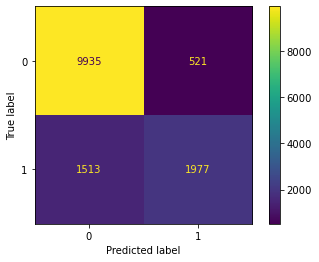

In [46]:
ConfusionMatrixDisplay.from_estimator(clf, whiteX,whiteY)
target_names = ['Income<=50','Income>50']
print(classification_report(whiteY, predWhite, target_names=target_names))

In [47]:
# Training for Race-Blind Classifer
trainX = trainData.drop(['Income','Race'],axis=1)
trainY = trainData.drop(['Age','WorkClass','fnlwgt','Education','Education_num','Martial_status','Occupation','Relationship','Race','Gender','capital_gain', 'capital_loss', 'hours_per_week','Country'],axis=1)
trainY = pd.get_dummies(trainY)
trainY = trainY.drop(['Income_ <=50K'], axis = 1)
trainX = pd.get_dummies(trainX)
testX = testData.drop(['Income','Race'],axis=1)
testY = testData.drop(['Age','WorkClass','fnlwgt','Education','Education_num','Martial_status','Occupation','Relationship','Race','Gender','capital_gain', 'capital_loss', 'hours_per_week','Country'],axis=1)
testY = pd.get_dummies(testY)
testY = testY.drop(['Income_<=50K.'],axis=1)
testY.columns=['Income_ >50K']
testX = pd.get_dummies(testX)
for co in testX.columns:
    if co not in trainX.columns:
        print(co)
for co in trainX.columns:
    if co not in testX.columns:
        print(co)

Education_10th
Education_11th
Education_12th
Education_1st-4th
Education_5th-6th
Education_7th-8th
Education_9th
Education_ 10th
Education_ 11th
Education_ 12th
Education_ 1st-4th
Education_ 5th-6th
Education_ 7th-8th
Education_ 9th
Country_ Holand-Netherlands


In [48]:
trainX = trainX.drop(['Country_ Holand-Netherlands'],axis=1)
trainX.rename(columns = {'Education_ 10th':'Education_10th','Education_ 11th':'Education_11th','Education_ 12th':'Education_12th','Education_ 1st-4th':'Education_1st-4th','Education_ 5th-6th':'Education_5th-6th','Education_ 7th-8th':'Education_7th-8th','Education_ 9th':'Education_9th'},inplace = True)
for co in testX.columns:
    if co not in trainX.columns:
        print(co)
for co in trainX.columns:
    print(co)
    if co not in testX.columns:
        print(co)

Age
fnlwgt
Education_num
capital_gain
capital_loss
hours_per_week
WorkClass_ ?
WorkClass_ Federal-gov
WorkClass_ Local-gov
WorkClass_ Never-worked
WorkClass_ Private
WorkClass_ Self-emp-inc
WorkClass_ Self-emp-not-inc
WorkClass_ State-gov
WorkClass_ Without-pay
Education_10th
Education_11th
Education_12th
Education_1st-4th
Education_5th-6th
Education_7th-8th
Education_9th
Education_ Assoc-acdm
Education_ Assoc-voc
Education_ Bachelors
Education_ Doctorate
Education_ HS-grad
Education_ Masters
Education_ Preschool
Education_ Prof-school
Education_ Some-college
Martial_status_ Divorced
Martial_status_ Married-AF-spouse
Martial_status_ Married-civ-spouse
Martial_status_ Married-spouse-absent
Martial_status_ Never-married
Martial_status_ Separated
Martial_status_ Widowed
Occupation_ ?
Occupation_ Adm-clerical
Occupation_ Armed-Forces
Occupation_ Craft-repair
Occupation_ Exec-managerial
Occupation_ Farming-fishing
Occupation_ Handlers-cleaners
Occupation_ Machine-op-inspct
Occupation_ Other

In [49]:
clf =  RandomForestClassifier(oob_score=True)
errors = []
estimators = []
for i in range(100,200):
    clf.set_params(n_estimators=i)
    clf.fit(trainX, trainY)
    estimators.append(i)
    oob_error = 1 - clf.oob_score_
    errors.append(oob_error)

/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/2723992037.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

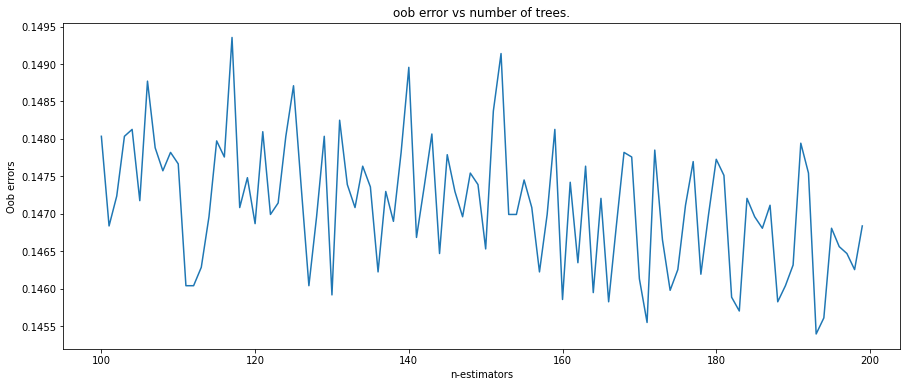

In [50]:
plt.figure(figsize=(15,6))
plt.plot(estimators, errors)
plt.xlabel("n-estimators")  # add X-axis label
plt.ylabel("Oob errors")  # add Y-axis label
plt.title("oob error vs number of trees.") 
plt.show(estimators,errors)

In [51]:
for i in range(0,100):
    if errors[i] < 0.1455:
        print(i)
        print(str(estimators[i]) + ": " + str(errors[i]))

93
193: 0.14539312039312036


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
clf.set_params(n_estimators=193)
clf.fit(trainX, trainY)
predB = clf.predict(testX)
confusionMatrixB = confusion_matrix(predB, testY)
print('Accuracy score: '+ str(accuracy_score(predB,testY)))
print('Confusion Matrix: ' + str(confusionMatrixB))

/var/folders/4k/859znx6d5bb2jr7f0sp80r180000gn/T/ipykernel_51308/150071148.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(trainX, trainY)
/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Accuracy score: 0.8600823045267489
Confusion Matrix: [[11843  1686]
 [  592  2160]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.88      0.95      0.91     12435
   Income>50       0.78      0.56      0.65      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.76      0.78     16281
weighted avg       0.85      0.86      0.85     16281



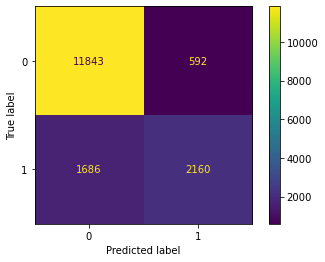

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
ConfusionMatrixDisplay.from_estimator(clf, testX, testY)
target_names = ['Income<=50','Income>50']
print(classification_report(testY, predB, target_names=target_names))

In [59]:
#Testing for Eskimo race-blind classifier
groupEskimoU = groupEskimo.drop(['Race_ Amer-Indian-Eskimo','Race_ Asian-Pac-Islander','Race_ Black','Race_ Other','Race_ White'],axis =1)
eskimoXU = groupEskimoU.drop(['Income_ >50K'],axis = 1)
eskimoYU = groupEskimoU['Income_ >50K']
predEskimoU = clf.predict(eskimoXU)
confusionMatrix = confusion_matrix(predEskimoU, eskimoYU)
print('Accuracy score: '+ str(accuracy_score(predEskimoU,eskimoYU)))
print('Confusion Matrix: ' + str(confusionMatrix))

Accuracy score: 0.9182389937106918
Confusion Matrix: [[136   9]
 [  4  10]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.94      0.97      0.95       140
   Income>50       0.71      0.53      0.61        19

    accuracy                           0.92       159
   macro avg       0.83      0.75      0.78       159
weighted avg       0.91      0.92      0.91       159



/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


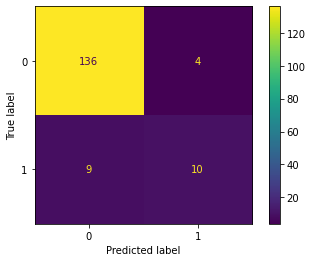

In [61]:
ConfusionMatrixDisplay.from_estimator(clf, eskimoXU,eskimoYU)
target_names = ['Income<=50','Income>50']
print(classification_report(eskimoYU, predEskimoU, target_names=target_names))

In [66]:
#Testing for Asian race-blind classifier
groupAsianU= groupAsian.drop(['Race_ Amer-Indian-Eskimo','Race_ Asian-Pac-Islander','Race_ Black','Race_ Other','Race_ White'],axis =1)
asianXU = groupAsianU.drop(['Income_ >50K'],axis = 1)
asianYU = groupAsianU['Income_ >50K']
predAsianU = clf.predict(asianXU)
confusionMatrix = confusion_matrix(predAsianU, asianYU)
print('Accuracy score: '+ str(accuracy_score(predAsianU,asianYU)))
print('Confusion Matrix: ' + str(confusionMatrix))

Accuracy score: 0.8333333333333334
Confusion Matrix: [[325  58]
 [ 22  75]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.85      0.94      0.89       347
   Income>50       0.77      0.56      0.65       133

    accuracy                           0.83       480
   macro avg       0.81      0.75      0.77       480
weighted avg       0.83      0.83      0.82       480



/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


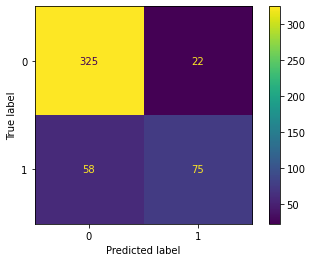

In [67]:
ConfusionMatrixDisplay.from_estimator(clf, asianXU,asianYU)
target_names = ['Income<=50','Income>50']
print(classification_report(asianYU, predAsianU, target_names=target_names))

In [68]:
#Testing for Other race-blind classifier
groupOtherU= groupOther.drop(['Race_ Amer-Indian-Eskimo','Race_ Asian-Pac-Islander','Race_ Black','Race_ Other','Race_ White'],axis =1)
otherXU = groupOtherU.drop(['Income_ >50K'],axis = 1)
otherYU = groupOtherU['Income_ >50K']
predOtherU = clf.predict(otherXU)
confusionMatrix = confusion_matrix(predOtherU, otherYU)
print('Accuracy score: '+ str(accuracy_score(predOtherU,otherYU)))
print('Confusion Matrix: ' + str(confusionMatrix))

Accuracy score: 0.8814814814814815
Confusion Matrix: [[109  15]
 [  1  10]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.88      0.99      0.93       110
   Income>50       0.91      0.40      0.56        25

    accuracy                           0.88       135
   macro avg       0.89      0.70      0.74       135
weighted avg       0.88      0.88      0.86       135



/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


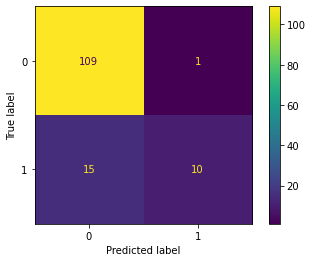

In [69]:
ConfusionMatrixDisplay.from_estimator(clf, otherXU,otherYU)
target_names = ['Income<=50','Income>50']
print(classification_report(otherYU,predOtherU, target_names=target_names))

In [70]:
#Testing for Black race-blind classifier
groupBlackU= groupBlack.drop(['Race_ Amer-Indian-Eskimo','Race_ Asian-Pac-Islander','Race_ Black','Race_ Other','Race_ White'],axis =1)
blackXU = groupBlackU.drop(['Income_ >50K'],axis = 1)
blackYU = groupBlackU['Income_ >50K']
predBlackU = clf.predict(blackXU)
confusionMatrix = confusion_matrix(predBlackU, blackYU)
print('Accuracy score: '+ str(accuracy_score(predBlackU,blackYU)))
print('Confusion Matrix: ' + str(confusionMatrix))

Accuracy score: 0.9244074311338886
Confusion Matrix: [[1351   87]
 [  31   92]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.94      0.98      0.96      1382
   Income>50       0.75      0.51      0.61       179

    accuracy                           0.92      1561
   macro avg       0.84      0.75      0.78      1561
weighted avg       0.92      0.92      0.92      1561



/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


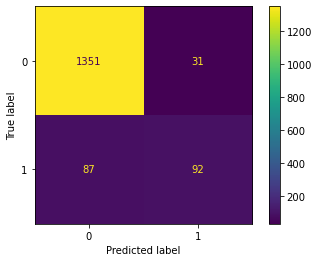

In [71]:
ConfusionMatrixDisplay.from_estimator(clf, blackXU,blackYU)
target_names = ['Income<=50','Income>50']
print(classification_report(blackYU,predBlackU, target_names=target_names))

In [72]:
#Testing for White race-blind classifier
groupWhiteU= groupWhite.drop(['Race_ Amer-Indian-Eskimo','Race_ Asian-Pac-Islander','Race_ Black','Race_ Other','Race_ White'],axis =1)
whiteXU = groupWhiteU.drop(['Income_ >50K'],axis = 1)
whiteYU = groupWhiteU['Income_ >50K']
predWhiteU = clf.predict(whiteXU)
confusionMatrix = confusion_matrix(predWhiteU, whiteYU)
print('Accuracy score: '+ str(accuracy_score(predWhiteU,whiteYU)))
print('Confusion Matrix: ' + str(confusionMatrix))

/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Accuracy score: 0.852932740570773
Confusion Matrix: [[9922 1517]
 [ 534 1973]]


/Users/gautamsamudrala/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

  Income<=50       0.87      0.95      0.91     10456
   Income>50       0.79      0.57      0.66      3490

    accuracy                           0.85     13946
   macro avg       0.83      0.76      0.78     13946
weighted avg       0.85      0.85      0.84     13946



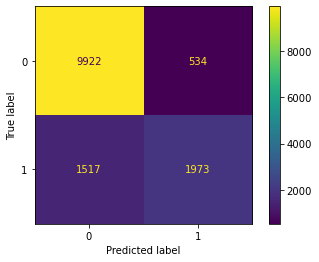

In [73]:
ConfusionMatrixDisplay.from_estimator(clf, whiteXU,whiteYU)
target_names = ['Income<=50','Income>50']
print(classification_report(whiteYU,predWhiteU, target_names=target_names))